# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import pprint
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ierapetra
Processing Record 2 of Set 1 | sardinata
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | kapa'a
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | pollau
Processing Record 13 of Set 1 | rio grande
Processing Record 14 of Set 1 | taroa
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | nazarovo
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | bardai
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | qaqor

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ierapetra,35.0100,25.7353,19.52,53,76,4.92,GR,1701875576
1,sardinata,8.0829,-72.8007,31.82,46,60,1.55,CO,1701875577
2,arraial do cabo,-22.9661,-42.0278,29.92,62,0,8.75,BR,1701875577
3,ushuaia,-54.8000,-68.3000,10.79,73,74,5.14,AR,1701875577
4,afaahiti,-17.7500,-149.2833,22.93,86,100,7.14,PF,1701875578


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ierapetra,35.0100,25.7353,19.52,53,76,4.92,GR,1701875576
1,sardinata,8.0829,-72.8007,31.82,46,60,1.55,CO,1701875577
2,arraial do cabo,-22.9661,-42.0278,29.92,62,0,8.75,BR,1701875577
3,ushuaia,-54.8000,-68.3000,10.79,73,74,5.14,AR,1701875577
4,afaahiti,-17.7500,-149.2833,22.93,86,100,7.14,PF,1701875578


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

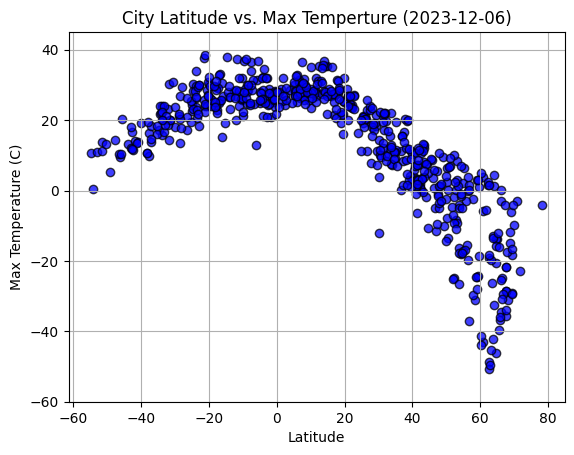

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperture (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.ylim(-60,45)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

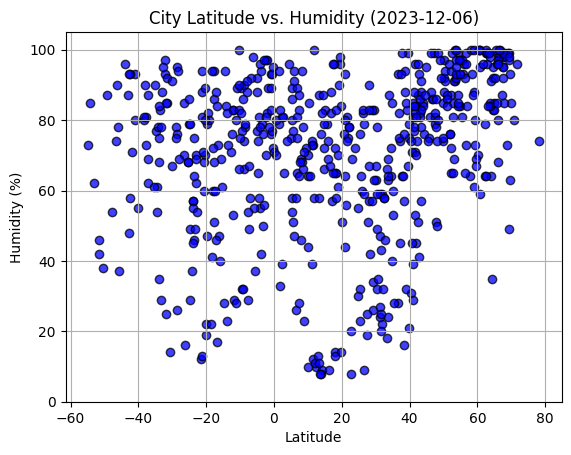

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,105)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

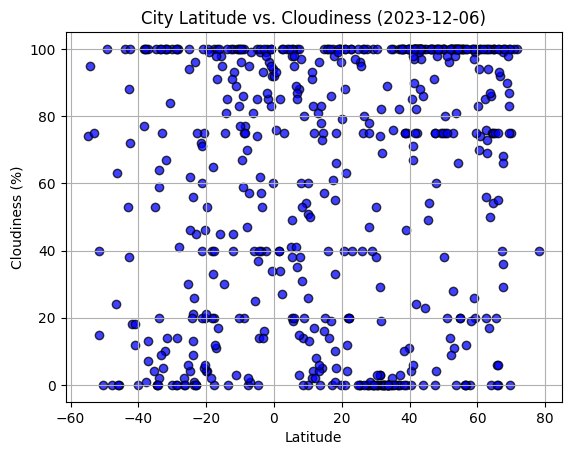

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

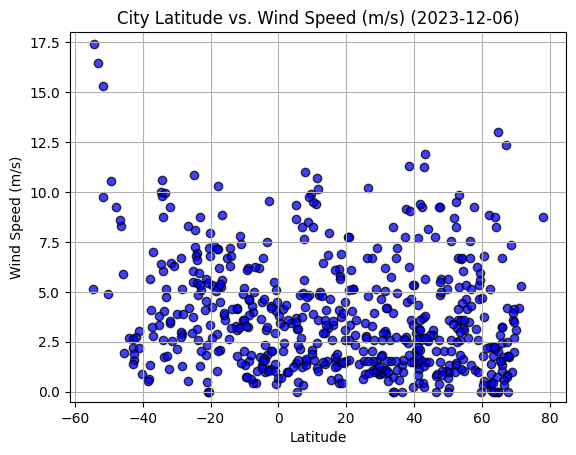

In [56]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s) (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.ylim(-0.5,18)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]>=0),:])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ierapetra,35.0100,25.7353,19.52,53,76,4.92,GR,1701875576
1,sardinata,8.0829,-72.8007,31.82,46,60,1.55,CO,1701875577
5,constantia,44.1833,28.6500,7.61,76,100,8.15,RO,1701875506
8,kapa'a,22.0752,-159.3190,24.18,78,20,5.14,US,1701875579
9,albany,42.6001,-73.9662,0.21,87,100,0.45,US,1701875521


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]<0),:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,arraial do cabo,-22.9661,-42.0278,29.92,62,0,8.75,BR,1701875577
3,ushuaia,-54.8000,-68.3000,10.79,73,74,5.14,AR,1701875577
4,afaahiti,-17.7500,-149.2833,22.93,86,100,7.14,PF,1701875578
6,margaret river,-33.9500,115.0667,15.66,75,2,6.03,AU,1701875578
7,adamstown,-25.0660,-130.1015,22.62,79,100,5.49,PN,1701875355


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8747961130947879


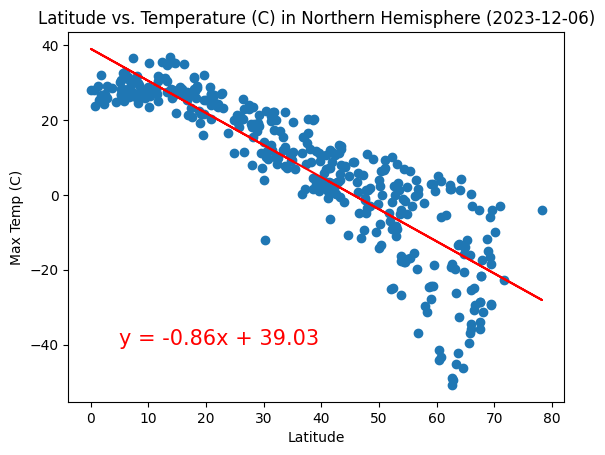

In [85]:
# Linear regression on Northern Hemisphere
# Linear regression equation and line to plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (5,-40),fontsize=15,color="red")
plt.title("Latitude vs. Temperature (C) in Northern Hemisphere (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.show()

The r-value is: 0.6931919030034991


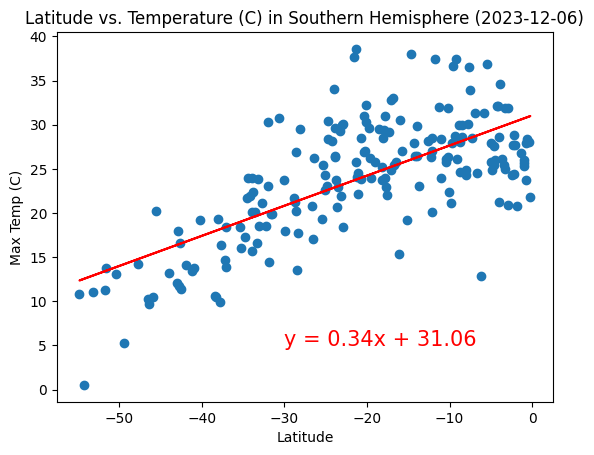

In [86]:
# Linear regression on Southern Hemisphere
# Linear regression equation and line to plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-30,5),fontsize=15,color="red")
plt.title("Latitude vs. Temperature (C) in Southern Hemisphere (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.show()

**Discussion about the linear relationship:** As the city latitude moves farther away from the equator (0), there is a decrease in max temperature observed. There is a sharer decline in the northern hemisphere data as expected because this analysis is being conducted in December. For the southern hemisphere, the temperature decline is still evident but not as severe as the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4184919888584292


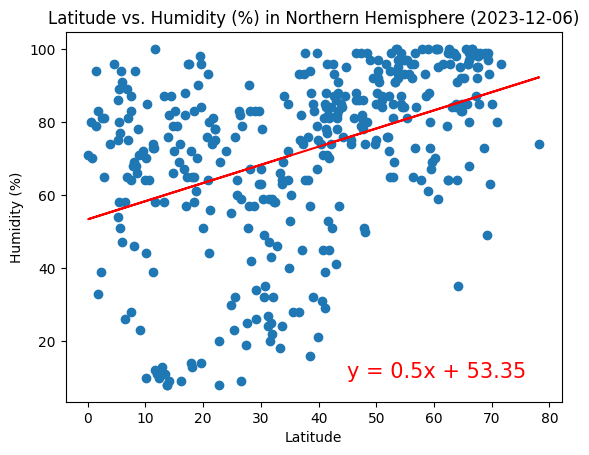

In [87]:
# Linear regression on Northern Hemisphere
# Linear regression equation and line to plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (45,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (%) in Northern Hemisphere (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.07162081088399558


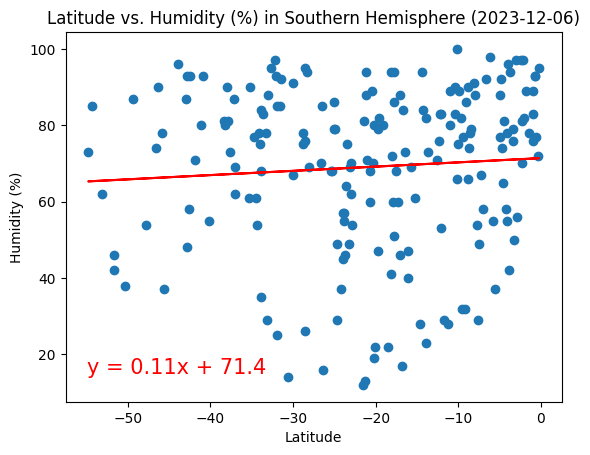

In [88]:
# Southern Hemisphere
# Linear regression equation and line to plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-55,15),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (%) in Southern Hemisphere (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** As the city latitude moves farther away from the equator (0), there are differences in trendlines for humidity observed. There is an increase in humidity in the northern hemisphere data while there is a decrease in humidity in the southern hemisphere. For the southern hemisphere, this makes sense as the warmer climates are more humid during the summer months. For the northern hemisphere, this also makes sense because humidity is a calculation of water vapor in the air. This measure is also relative to the temperature of the air, so a lower observed temperature can raise the humidity level.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1945197445234656


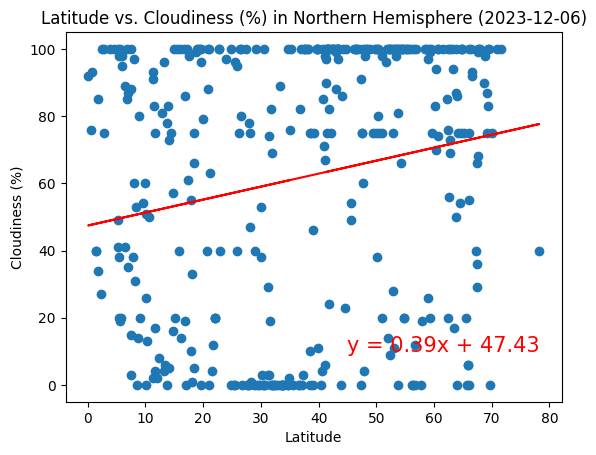

In [89]:
# Linear regression on Northern Hemisphere
# Linear regression equation and line to plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (45,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness (%) in Northern Hemisphere (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.21808569851573592


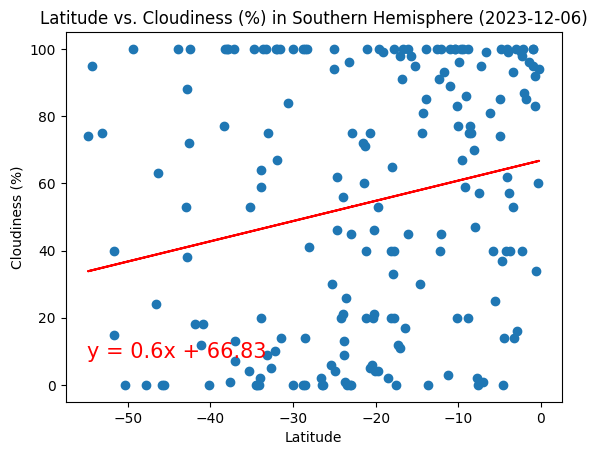

In [90]:
# Linear regression on Southern Hemisphere
# Linear regression equation and line to plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-55,8),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness (%) in Southern Hemisphere (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** As the city latitude moves farther away from the equator (0), there are differences in trendlines for cloudiness observed. There is an increase in cloudiness in the northern hemisphere data while there is a decrease in cloudiness in the southern hemisphere. For the northern hemisphere, makes sense because generally winter and colder weather bring about more unsettled weather, contributing to the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05489173192884518


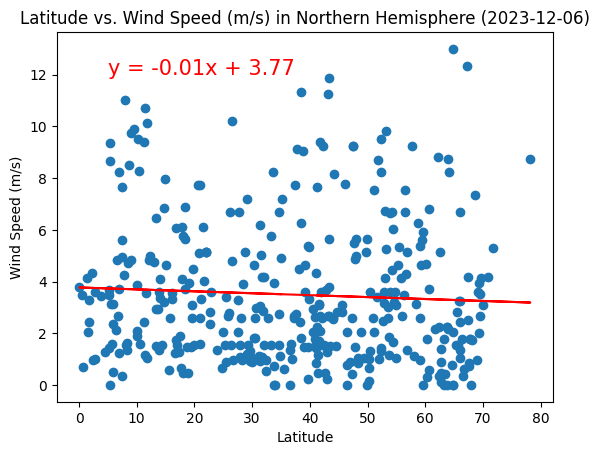

In [91]:
# Linear regression on Northern Hemisphere
# Linear regression equation and line to plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (5,12),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (m/s) in Northern Hemisphere (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.33440866882636994


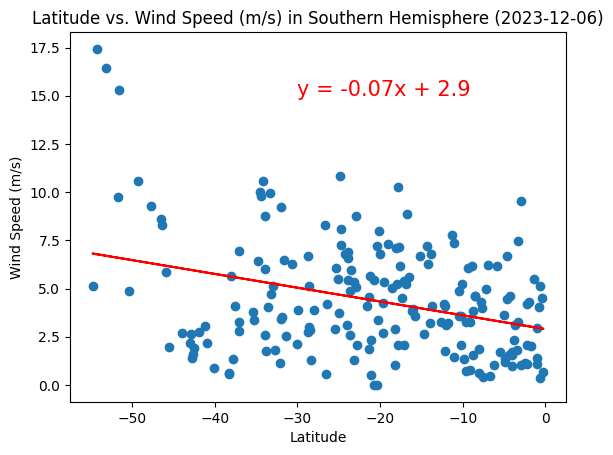

In [92]:
# Southern Hemisphere
# Linear regression equation and line to plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-30,15),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (m/s) in Southern Hemisphere (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** As the city latitude moves farther away from the equator (0), there are differences in trendlines for wind speed observed. There is a slight decrease in wind speed in the northern hemisphere data while there is an increase in wind speed in the southern hemisphere.